In [167]:
#Import pyspark
!pip install pyspark

In [168]:
# Import SparkSession
from pyspark.sql import SparkSession

In [169]:
spark_session = SparkSession.builder.appName("ChicagoCrimeAnalysis").getOrCreate()

In [170]:
spark_session
# Import a Spark function from library

In [171]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType, FloatType

schema_name = StructType([
    StructField("ID", IntegerType(), True),
    StructField("CaseNumber", StringType(), True),
    StructField("Date", StringType(), True),
    StructField("Block", StringType(), True),
    StructField("IUCR", StringType(), True),
    StructField("PrimaryType", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("LocationDescription", StringType(), True),
    StructField("Arrest", StringType(), True),
    StructField("Domestic", StringType(), True),
    StructField("Beat", IntegerType(), True),
    StructField("District", IntegerType(), True),
    StructField("Ward", IntegerType(), True),
    StructField("CommunityArea", IntegerType(), True),
    StructField("FBICode", StringType(), True),
    StructField("XCoordinate", FloatType(), True),
    StructField("YCoordinate", FloatType(), True),
    StructField("Year", IntegerType(), True),
    StructField("UpdatedOn", TimestampType(), True),
    StructField("Latitude", FloatType(), True),
    StructField("Longitude", FloatType(), True),
    StructField("Location", StringType(), True)
])


In [172]:
df=spark_session.read.csv("Crimes_-_2001_to_Present.csv",header=True,inferSchema=True)

In [173]:
df.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [174]:
df.count()

7918798

In [175]:
df.show()

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11037294|   JA371270|03/18/2015 12:00:...|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK|

Remove null values

In [176]:
#Remove all null values.
from pyspark.sql.functions import col
df = df.na.drop()
df.show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12045583|   JD226426|05/07/2020 10:24:...| 035XX S INDIANA AVE|0820|               THEFT|      $500 AND UNDER|           AP

In [177]:
df.count()

7214526

Changing date column data type

In [178]:
from pyspark.sql.functions import to_timestamp

# Change 'Date' column data type
df = df.withColumn("Date", to_timestamp("Date", "MM/dd/yyyy hh:mm:ss a"))
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [179]:
df.select('Date')

DataFrame[Date: timestamp]

# Filtering Data for last 10 years

In [180]:
from pyspark.sql.functions import col
df = df.where(col("Year") >= 2013)
df.show()

+--------+-----------+-------------------+--------------------+----+-----------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|     Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-----------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12045583|   JD226426|2020-05-07 10:24:00| 035XX S INDIANA AVE|0820|            THEFT|      $500 AND UNDER|           APARTMENT| false| 

In [181]:
df.count()

2734339

## 6. Remove all the records with the following crime types:
'NON-CRIMINAL (SUBJECT SPECIFIED)'<br>
'OTHER OFFENSE'<br>
'STALKING'<br>
'NON - CRIMINAL'<br>
'ARSON'

In [182]:
# Remove all the records with the following crime types
df = df.filter(col("Primary Type").isin([
    "NON-CRIMINAL (SUBJECT SPECIFIED)",
    "OTHER OFFENSE",
    "STALKING",
    "NON - CRIMINAL",
    "ARSON"
]) == False)

In [183]:
df.show()

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12045583|   JD226426|2020-05-07 10:24:00| 035XX S INDIANA AVE|0820|              THEFT|      $500 AND UNDER|           APARTMENT|

Merge similar crime types

In [192]:
# Creating a function to merge similar crime types
def map_CrimeType(input_df):
    input_df = input_df.withColumn("Primary Type", 
        when(input_df["Primary Type"].isin('CRIMINAL SEXUAL ASSAULT', 'SEXUAL ASSAULT','CRIM SEXUAL ASSAULT'),'SEX ASSAULT')
        .when(input_df["Primary Type"] == 'BATTERY', 'ASSAULT')
        .when(input_df["Primary Type"] == 'CRIMINAL DAMAGE', 'PROPERTY DAMAGE')
        .when(input_df["Primary Type"] == 'HOMICIDE', 'MURDER')
        .when(input_df["Primary Type"].isin('SEX OFFENSE', 'PROSTITUTION'), 'SEX OFFENSE')
        .when(input_df["Primary Type"].isin('CRIMINAL TRESPASS', 'ROBBERY', 'THEFT', 'BURGLARY','MOTOR VEHICLE THEFT'), 'ROBBERY/TRESPASS/THEFT/BURGLARY')
        .when(input_df["Primary Type"] == 'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE INTERFERENCE')
        .when(input_df["Primary Type"].isin('OTHER NARCOTIC VIOLATION','NARCOTIC','NARCOTICS'),'NARCOTICS')
        .when(input_df["Primary Type"].isin('LIQUOR LAW VIOLATION', 'RITUALISM', 'GAMBLING'), 'RITUALISM/GAMBLING/LAW VIOLATION')
        .when(input_df["Primary Type"] == 'PUBLIC INDECENCY', 'INDECENCY')
        
        .when(input_df["Primary Type"] == 'WEAPONS VIOLATION', 'WEAPONS')
        .otherwise(input_df['Primary Type']))
    return input_df

# Applying the function to your DataFrame
df = map_CrimeType(df)


In [193]:
df.show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12045583|   JD226426|2020-05-07 10:24:00| 035XX S INDIANA AVE|0820|ROBBERY/TRESPASS/...|      $500 AND UNDER|           APARTM

In [194]:
df.select("Primary Type").distinct().show(100,False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|PROPERTY DAMAGE                  |
|OFFENSE INVOLVING CHILDREN       |
|SEX ASSAULT                      |
|PUBLIC PEACE VIOLATION           |
|WEAPONS                          |
|OBSCENITY                        |
|ASSAULT                          |
|MURDER                           |
|PUBLIC PEACE INTERFERENCE        |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|DECEPTIVE PRACTICE               |
|CONCEALED CARRY LICENSE VIOLATION|
|ROBBERY/TRESPASS/THEFT/BURGLARY  |
|SEX OFFENSE                      |
|NARCOTICS                        |
|NON-CRIMINAL                     |
|RITUALISM/GAMBLING/LAW VIOLATION |
|KIDNAPPING                       |
|INDECENCY                        |
+---------------------------------+



Analyze the data and present results:
* Show year-wise trend of the crime for last ten years.
* Find out at which hour of the day crime is highest.
* Find top ten crimes and present them as a bar chart.

In [195]:
# Show year-wise trend of the crime for last ten years.
crime_yearwise= df.groupBy("Year").count().orderBy("Year")
crime_yearwise.show()

+----+------+
|Year| count|
+----+------+
|2013|287822|
|2014|256123|
|2015|239889|
|2016|248589|
|2017|246560|
|2018|245378|
|2019|240849|
|2020|193864|
|2021|187552|
|2022|217404|
|2023|190540|
+----+------+



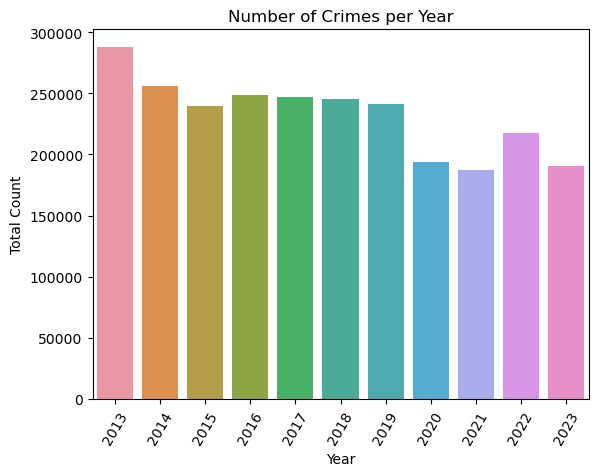

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
crime_yearwise_df = crime_yearwise.toPandas()
sns.barplot(x="Year", y="count", data=crime_yearwise_df)
plt.xticks(rotation=60)
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.title("Number of Crimes per Year")
plt.show()

+----+------+
|hour| count|
+----+------+
|  12|147571|
+----+------+
only showing top 1 row



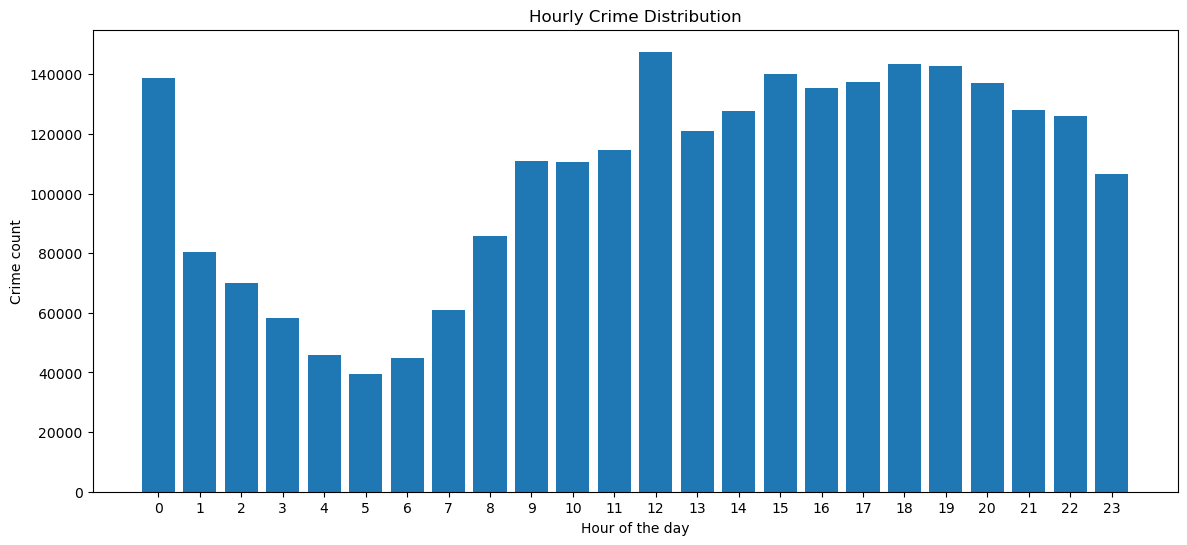

In [197]:
from pyspark.sql.functions import hour, desc
# Find out at which hour of the day crime is highest.
crimehigh_hr = df.groupBy(hour(col("Date")).alias("hour")).count().orderBy(desc("count"))
crimehigh_hr.show(1)

# Convert the Spark DataFrame to a Pandas DataFrame
crimehigh_hr_df = crimehigh_hr.toPandas()

# bar plot of the crime counts by hour
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(crimehigh_hr_df['hour'], crimehigh_hr_df['count'], width=0.8)
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Crime count')
ax.set_title('Hourly Crime Distribution')
plt.xticks(range(0,24))
plt.show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|ROBBERY/TRESPASS/...|1047693|
|             ASSAULT| 715807|
|     PROPERTY DAMAGE| 301458|
|  DECEPTIVE PRACTICE| 167670|
|           NARCOTICS| 156468|
|             WEAPONS|  62699|
|OFFENSE INVOLVING...|  22491|
|         SEX OFFENSE|  19598|
|PUBLIC PEACE VIOL...|  17672|
|         SEX ASSAULT|  15242|
+--------------------+-------+



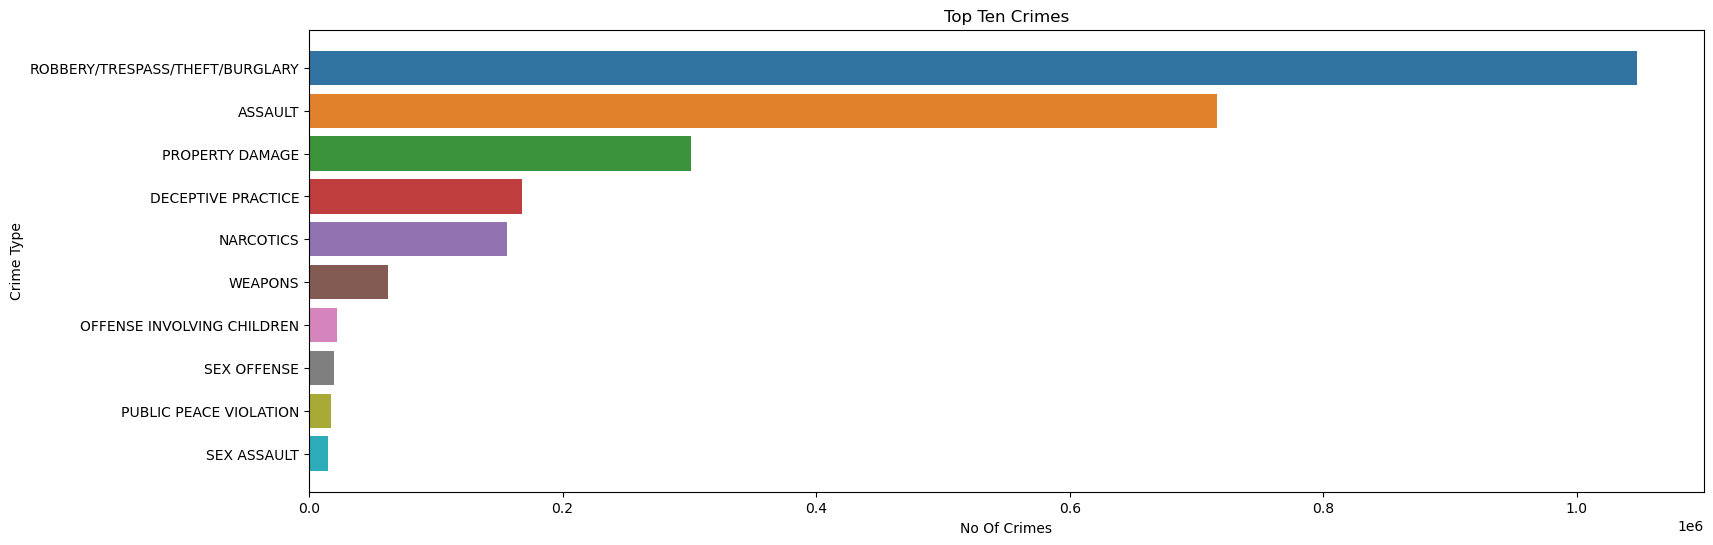

In [198]:
top10_crimes = df.groupBy("Primary Type").count().orderBy("count", ascending=False).limit(10)
top10_crimes_df = top10_crimes.toPandas()

top10_crimes.show()

plt.figure(figsize=(18,6))

sns.barplot(data = top10_crimes_df, x = 'count', y = 'Primary Type')
plt.bar(top10_crimes_df["count"],top10_crimes_df["Primary Type"])
plt.ylabel("Crime Type")
plt.xlabel("No Of Crimes")
plt.title("Top Ten Crimes")

plt.show()